# Customer Segmentation Analysis: Enhancing Engagement and Retention in E-commerce

## Project Overview

In the fast-paced world of e-commerce, understanding customer behavior at a detailed level is crucial for business growth and maintaining customer loyalty. As customer bases grow and diversify, traditional one-size-fits-all marketing strategies often fall short, leading to low-impact promotions and missed opportunities for personalized engagement.

This project aims to build a **segmentation model** to identify distinct customer profiles based on **purchasing behavior, geographic distribution, and engagement patterns**. By applying clustering techniques like **K-means, DBSCAN, and hierarchical clustering** on customer transaction data, this analysis seeks to uncover hidden patterns in **spending habits, product preferences, purchase frequency, and geographic trends**.

---

## Project Objectives

1. **Identify High-Value Segments**  
   - Find clusters of high-value customers with unique purchasing behaviors to enable targeted loyalty programs and retention strategies.

2. **Improve Marketing ROI**  
   - Develop personalized marketing strategies for each segment, reducing wasted spending on generalized promotions and enhancing customer engagement through tailored offers.

3. **Enhance Operational Efficiency**  
   - Use geospatial segmentation to optimize logistics and reduce delivery times by pinpointing regional clusters with high purchasing density.

4. **Predictive Insights for Customer Lifecycle Management**  
   - Provide insights to predict potential churn within each segment by analyzing behavior and transaction trends.

---

## Expected Business Impact

By uncovering actionable customer segments, this project will help make data-driven decisions to:
- Increase **customer satisfaction**
- Improve **retention rates**
- Boost **long-term revenue**

The segmentation model will provide a scalable foundation for predicting customer behavior, improving targeted marketing, and enhancing logistics efficiency.

This approach makes customer segmentation a valuable tool for both immediate insights and strategic long-term planning in customer lifecycle management and operational improvements.


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import LabelEncoder

In [2]:
customer_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_customers_dataset.csv")
geolocation_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_geolocation_dataset.csv")
items_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_order_items_dataset.csv")
payments_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_order_payments_dataset.csv")
reviews_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_orders_dataset.csv")
products_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_products_dataset.csv")
sellers_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\olist_sellers_dataset.csv")
category_product_df = pd.read_csv("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\product_category_name_translation.csv")

df_list =[customer_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_product_df]
keys = str.split("customer_df, geolocation_df, items_df, payments_df, reviews_df, orders_df, products_df, sellers_df, category_product_df",sep = ', ')
df_dict = dict(zip(keys, df_list))

def save_image(title):
    plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{title}.png",dpi =300)

In [3]:
#each dataset information and structure
for k,v in df_dict.items():
    print(f"{k}:-")
    print(v.info())
    print('*-'*76)

customer_df:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
geolocation_df:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 n

In [4]:
#null values
for k,v in df_dict.items():
    print(f"{k}:-")
    print(v.isnull().sum())
    print('*-'*76)

customer_df:-
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
geolocation_df:-
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
items_df:-
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

*Examining Null values

In [5]:
reviews_df[reviews_df.isnull().any(axis = 1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
orders_df[orders_df.isnull().any(axis = 1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [7]:
products_df[products_df.isnull().any(axis = 1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [8]:
missing_value_products_df_percentage =  (products_df.isnull().sum()/len(products_df)) * 100
missing_value_reviews_df_percentage = (reviews_df.isnull().sum()/len(reviews_df)) * 100
missing_value_orders_df_percentage = (orders_df.isnull().sum()/len(orders_df)) * 100

In [9]:
'''
fig, axes = plt.subplots(3,1,figsize = (7,20))

sns.heatmap(products_df.isnull(),ax= axes[0], cmap = 'viridis')
axes[0].set_title("products_df missing values")
sns.heatmap(reviews_df.isnull(),ax= axes[1], cmap = 'viridis')
axes[1].set_title("reviews_df missing values")
sns.heatmap(orders_df.isnull(),ax= axes[2], cmap = 'viridis')
axes[2].set_title("orders_df missing values")
plt.tight_layout()
plt.savefig("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\null_values_heatmap.png", dpi = 300)
plt.show()
'''

'\nfig, axes = plt.subplots(3,1,figsize = (7,20))\n\nsns.heatmap(products_df.isnull(),ax= axes[0], cmap = \'viridis\')\naxes[0].set_title("products_df missing values")\nsns.heatmap(reviews_df.isnull(),ax= axes[1], cmap = \'viridis\')\naxes[1].set_title("reviews_df missing values")\nsns.heatmap(orders_df.isnull(),ax= axes[2], cmap = \'viridis\')\naxes[2].set_title("orders_df missing values")\nplt.tight_layout()\nplt.savefig("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\null_values_heatmap.png", dpi = 300)\nplt.show()\n'

In [10]:
'''
fig,axes = plt.subplots(3,1,figsize = (7,20))
missing_value_products_df_percentage.plot(ax=axes[0],kind = 'bar', color = 'red')
axes[0].set_title("Missing Values Percentage in products_df")
axes[0].set_ylabel("Percentage")

missing_value_reviews_df_percentage.plot(ax=axes[1],kind = 'bar', color = 'green')
axes[1].set_title("Missing Values Percentage in reviews_df")
axes[1].set_ylabel("Percentage")

missing_value_orders_df_percentage.plot(ax=axes[2],kind = 'bar', color = 'blue')
axes[2].set_title("Missing Values Percentage in orders_df")
axes[2].set_ylabel("Percentage")

plt.tight_layout()
plt.savefig("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\null_values_bar_plot.png", dpi = 300)
plt.show()
'''

'\nfig,axes = plt.subplots(3,1,figsize = (7,20))\nmissing_value_products_df_percentage.plot(ax=axes[0],kind = \'bar\', color = \'red\')\naxes[0].set_title("Missing Values Percentage in products_df")\naxes[0].set_ylabel("Percentage")\n\nmissing_value_reviews_df_percentage.plot(ax=axes[1],kind = \'bar\', color = \'green\')\naxes[1].set_title("Missing Values Percentage in reviews_df")\naxes[1].set_ylabel("Percentage")\n\nmissing_value_orders_df_percentage.plot(ax=axes[2],kind = \'bar\', color = \'blue\')\naxes[2].set_title("Missing Values Percentage in orders_df")\naxes[2].set_ylabel("Percentage")\n\nplt.tight_layout()\nplt.savefig("E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\null_values_bar_plot.png", dpi = 300)\nplt.show()\n'

In [11]:
products_df = products_df.dropna().drop_duplicates()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [12]:
orders_df = orders_df.dropna().drop_duplicates()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [13]:
# Convert date columns in orders_df
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Verify the conversion
print(orders_df.dtypes)


order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [14]:
invalid_dates = orders_df[orders_df['order_purchase_timestamp'].isna()]
print(invalid_dates)

Empty DataFrame
Columns: [order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date]
Index: []


In [15]:
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])
print(items_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


### Dataset Insights

### 1. Zip Code Prefix (Customer and Geolocation Data)
- Both `customer_df` and `geolocation_df` contain `zip_code_prefix` values that can be used to analyze **regional trends** and segment customers by location.
- The wide range of zip codes in these datasets indicates a broad geographic distribution of customers and locations, with `min` and `max` zip code prefixes ranging from **1003** to **99990**.
- Future analysis could involve categorizing zip codes into larger regions or clusters to explore geographical patterns in customer behavior or shipping times.

### 2. Order Details (items_df, orders_df)
- The `items_df` includes features like `shipping_limit_date`, `price`, and `freight_value`, which are crucial for understanding **order values** and **shipping costs**.
  - Example: **price** ranges from **0.85** to **6735.00**, while **freight_value** ranges from **0.00** to **409.68**.
- The `orders_df` contains important **timestamps** for order processing (purchase, approval, delivery) that will help in calculating **time-to-deliver**, **processing time**, and potential delays.
  - Ensure that the date and time fields (currently in `object` format) are converted to `datetime` for accurate time-based analysis.

### 3. Payment Details (payments_df)
- The `payments_df` provides insights into customer **payment behavior**, such as the number of installments and payment values.
  - **Payment value** ranges from **0.00** to **13,664.08**, with an average of **154.10**, suggesting a wide variance in customer spending patterns.
- Cross-referencing `payment_value` with order information can provide deeper insights into how customers finance their purchases, especially in relation to order amounts.

### 4. Review Data (reviews_df)
- The `review_score` data indicates generally positive customer satisfaction, with a mean score of **4.08** and most reviews clustered around the 4-5 range.
- This dataset could be useful for **customer satisfaction analysis**, where customers can be segmented based on their feedback scores. It may also be useful for identifying potential customer dissatisfaction (low scores).

### 5. Product Details (products_df)
- The `products_df` dataset provides detailed information on product characteristics, such as **weight**, **dimensions**, and the number of **photos** available for each product.
  - There is a wide variation in product weights (ranging from **0.00** to **40,425.00 grams**) and dimensions, which could impact **shipping costs** or **logistics** decisions.
- This dataset can be useful for clustering products by their physical characteristics to analyze how size or weight influences other aspects like shipping costs or customer reviews.

### 6. Sellers Data (sellers_df)
- The `sellers_df` contains information on the **zip code prefixes** of sellers, which can be used to analyze **seller distribution** across regions.
- Understanding seller locations in relation to customer locations could help identify regional patterns in shipping times or performance metrics for sellers in different areas.

### 7. Category and Product Translation (category_product_df)
- This dataset provides a mapping of product categories to their English names, which will be helpful for interpreting and labeling product data in the analysis.
- Merging this dataset with `products_df` will allow for easier understanding and analysis of product categories during further exploration and segmentation.

In [16]:
del df_dict['reviews_df']
for key,value in df_dict.items():
    print(f"{key}:-")
    display(value.describe())
    print("*-"*76)

customer_df:-


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
geolocation_df:-


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
items_df:-


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
payments_df:-


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
orders_df:-


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
products_df:-


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
sellers_df:-


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
category_product_df:-


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


In [17]:
for data in df_dict:
    print(f"{data}:- ")
    display(df_dict[data].info())

customer_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

geolocation_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

items_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


None

payments_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

orders_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

products_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

sellers_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

category_product_df:- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

### Distribution and Outliers

### 1. **Product Width (cm)**
- **Summary Statistics:**
  - Mean: 27.6 cm
  - Median: 26 cm
  - Standard Deviation: 8.2 cm
  - Min: 5 cm
  - Max: 120 cm
- **Insights:**
  - **Distribution:** Right-skewed, with most products having a width between 10 cm and 30 cm.
  - **Outliers:** Several outliers above 50 cm, with the maximum being 120 cm.

### 2. **Product Height (cm)**
- **Summary Statistics:**
  - Mean: 16.6 cm
  - Median: 14 cm
  - Standard Deviation: 10.3 cm
  - Min: 2 cm
  - Max: 105 cm
- **Insights:**
  - **Distribution:** Skewed towards shorter heights, with the majority below 30 cm.
  - **Outliers:** Some notable outliers above 40 cm, peaking at 105 cm.

### 3. **Product Length (cm)**
- **Summary Statistics:**
  - Mean: 34.5 cm
  - Median: 30 cm
  - Standard Deviation: 14.1 cm
  - Min: 7 cm
  - Max: 105 cm
- **Insights:**
  - **Distribution:** Most products are between 10 cm and 50 cm.
  - **Outliers:** Values above 60 cm are outliers, with a few reaching 105 cm.

### 4. **Product Weight (g)**
- **Summary Statistics:**
  - Mean: 2141.9 g
  - Median: 1300 g
  - Standard Deviation: 3000.4 g
  - Min: 0 g
  - Max: 40000 g
- **Insights:**
  - **Distribution:** Heavily concentrated around lower weights, with the median much lower than the mean due to right-skewness.
  - **Outliers:** Many outliers above 5000 g, with a maximum of 40,000 g.

### 5. **Product Photos Quantity**
- **Summary Statistics:**
  - Mean: 1.8 photos
  - Median: 2 photos
  - Standard Deviation: 1.0 photos
  - Min: 0 photos
  - Max: 20 photos
- **Insights:**
  - **Distribution:** Most products have 2-3 photos.
  - **Outliers:** Some outliers with as many as 10-20 photos.

### 6. **Product Description Length**
- **Summary Statistics:**
  - Mean: 762.5 characters
  - Median: 649 characters
  - Standard Deviation: 417.3 characters
  - Min: 0 characters
  - Max: 4000 characters
- **Insights:**
  - **Distribution:** Most descriptions are between 500-1500 characters long.
  - **Outliers:** Significant outliers above 2000 characters, with the longest description at 4000 characters.

### 7. **Product Name Length**
- **Summary Statistics:**
  - Mean: 49.7 characters
  - Median: 50 characters
  - Standard Deviation: 10.5 characters
  - Min: 2 characters
  - Max: 70 characters
- **Insights:**
  - **Distribution:** Names are fairly uniformly distributed around the median of 50 characters.
  - **Outliers:** A few outliers exist on the shorter end below 20 characters.

### 8. **Seller Zip Code Prefix**
- **Summary Statistics:**
  - Min: 0
  - Max: 99999
  - Mean: 29990
  - Median: 22220
- **Insights:** 
  - No significant outliers, with sellers spread out across multiple zip codes.

### 9. **Payment Value**
- **Summary Statistics:**
  - Mean: 154.6
  - Median: 80
  - Standard Deviation: 236.9
  - Min: 0
  - Max: 14,000
- **Insights:**
  - **Distribution:** Skewed heavily towards lower payment values, with most values below 1000.
  - **Outliers:** Numerous outliers exist, with a maximum value of 14,000.

### 10. **Payment Installments**
- **Summary Statistics:**
  - Mean: 2.9 installments
  - Median: 1 installment
  - Standard Deviation: 2.4 installments
  - Min: 1 installment
  - Max: 24 installments
- **Insights:**
  - **Distribution:** Most payments are made in fewer than 5 installments.
  - **Outliers:** Several instances of high installment numbers, peaking at 24.

### 11. **Payment Sequential**
- **Summary Statistics:**
  - Min: 1
  - Max: 30
  - Mean: 1.2
  - Median: 1
- **Insights:**
  - **Distribution:** Payments are sequential, but no significant skewness or outliers are observed.

### 12. **Freight Value**
- **Summary Statistics:**
  - Mean: 19.7
  - Median: 15.1
  - Standard Deviation: 15.5
  - Min: 0
  - Max: 400
- **Insights:**
  - **Distribution:** Most freight values are low, with values below 100.
  - **Outliers:** Several values spike beyond 100, with the maximum being 400.

### 13. **Geolocation Longitude and Latitude**
- **Summary Statistics (Longitude):**
  - Min: -106
  - Max: 106
  - Median: -50
- **Summary Statistics (Latitude):**
  - Min: -34
  - Max: 34
  - Median: -22
- **Insights:**
  - Both longitude and latitude are well-distributed around their respective medians.
  - Some outliers indicate possible errors or distant locations.

### 14. **Customer Zip Code Prefix**
- **Summary Statistics:**
  - Min: 0
  - Max: 99999
  - Mean: 29500
  - Median: 23000
- **Insights:**
  - The customer zip codes are widely spread across regions with no significant outliers.

### 15. **Review Scores**
- **Summary Statistics:**
  - Mean: 4.1
  - Median: 5.0
  - Standard Deviation: 1.1
  - Min: 1
  - Max: 5
- **Insights:**
  - **Distribution:** Most reviews are concentrated between 4.0 and 5.0, reflecting positive feedback.
  - **Outliers:** A few scores fall below 3.0, indicating negative reviews for some products.


In [18]:
'''
def plot_numerical_histograms(df):
    # Select integer features
    integer_features = df.select_dtypes(include=(['int64','float64']))
    
    # Loop through each integer feature and plot a histogram
    for column in integer_features.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=30, edgecolor='black')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Histogram')
        plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{column}_histogram.png", dpi = 300)
        plt.show()


'''

'\ndef plot_numerical_histograms(df):\n    # Select integer features\n    integer_features = df.select_dtypes(include=([\'int64\',\'float64\']))\n    \n    # Loop through each integer feature and plot a histogram\n    for column in integer_features.columns:\n        plt.figure(figsize=(8, 6))\n        plt.hist(df[column], bins=30, edgecolor=\'black\')\n        plt.xlabel(column)\n        plt.ylabel(\'Frequency\')\n        plt.title(f\'{column} Histogram\')\n        plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{column}_histogram.png", dpi = 300)\n        plt.show()\n\n\n'

In [19]:
'''
for key,df in df_dict.items():
    plot_numerical_histograms(df)
'''

'\nfor key,df in df_dict.items():\n    plot_numerical_histograms(df)\n'

In [20]:
'''
def plot_numerical_boxplots(df):
    # Select numerical features (both int and float types)
    numerical_features = df.select_dtypes(include=['int64', 'float64'])
    
    # Loop through each numerical feature and plot a box plot
    for column in numerical_features.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'{column} Box Plot')
        plt.xlabel(column)
        plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{column}_boxplot.png", dpi = 300)
        plt.show()
'''

'\ndef plot_numerical_boxplots(df):\n    # Select numerical features (both int and float types)\n    numerical_features = df.select_dtypes(include=[\'int64\', \'float64\'])\n    \n    # Loop through each numerical feature and plot a box plot\n    for column in numerical_features.columns:\n        plt.figure(figsize=(8, 6))\n        sns.boxplot(x=df[column])\n        plt.title(f\'{column} Box Plot\')\n        plt.xlabel(column)\n        plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{column}_boxplot.png", dpi = 300)\n        plt.show()\n'

In [21]:
'''
for df in df_list:
    plot_numerical_boxplots(df)
'''

'\nfor df in df_list:\n    plot_numerical_boxplots(df)\n'

In [22]:
'''
# Loop through the dictionary of DataFrames
for key, df in df_dict.items():
    # Check if the DataFrame is empty
    if df.empty:
        print(f"{key} is empty, skipping...")
        continue
    
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['number'])
    
    # Check if the numeric DataFrame is empty
    if numeric_df.empty:
        print(f"{key} does not have numeric columns, skipping...")
        continue
    
    # Optionally drop rows with missing values
    numeric_df = numeric_df.dropna()
    
    # Check if the DataFrame has rows after dropping NaNs
    if numeric_df.empty:
        print(f"{key} does not have enough data after dropping NaN values, skipping...")
        continue
    
    # Plot the pairplot
    print(f"Plotting {key}...")
    sns.pairplot(numeric_df)
    
    # Save the plot to the specified directory
    plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{key}_pairplot.png", dpi=300)
    
    # Show the plot
    plt.show()
''' 

'\n# Loop through the dictionary of DataFrames\nfor key, df in df_dict.items():\n    # Check if the DataFrame is empty\n    if df.empty:\n        print(f"{key} is empty, skipping...")\n        continue\n    \n    # Select only numeric columns\n    numeric_df = df.select_dtypes(include=[\'number\'])\n    \n    # Check if the numeric DataFrame is empty\n    if numeric_df.empty:\n        print(f"{key} does not have numeric columns, skipping...")\n        continue\n    \n    # Optionally drop rows with missing values\n    numeric_df = numeric_df.dropna()\n    \n    # Check if the DataFrame has rows after dropping NaNs\n    if numeric_df.empty:\n        print(f"{key} does not have enough data after dropping NaN values, skipping...")\n        continue\n    \n    # Plot the pairplot\n    print(f"Plotting {key}...")\n    sns.pairplot(numeric_df)\n    \n    # Save the plot to the specified directory\n    plt.savefig(f"E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\{key}_pair

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [24]:
orders_df['order_processing_time'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
orders_df['shipping_preparation_time'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
orders_df['shipping_preparation_time'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
orders_df['total_delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
orders_df['delivery_delay'] = orders_df['order_delivered_customer_date'] - orders_df['order_estimated_delivery_date']
orders_df['is_delivered'] = orders_df['order_status'].apply(lambda x: 1 if x == 'delivered' else 0)
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.month
orders_df['order_day_of_week'] = orders_df['order_purchase_timestamp'].dt.dayofweek
orders_df['delivery_accuracy'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']


### Why Set `order_purchase_timestamp` as the Index?

Setting `order_purchase_timestamp` as the index is a practical choice for time series analysis. By doing so, we simplify the process of performing operations that rely on time, such as resampling, aggregating, or analyzing trends over different periods.

Having the timestamp as the index allows for more intuitive plotting, with the date or time automatically recognized as the x-axis, making trend visualization easier. It also helps with operations like grouping data by day, week, or month, streamlining the process without needing extra columns or complex commands.

Additionally, this approach enhances performance for time-based queries, as filtering or searching within specific date ranges becomes faster and more efficient.

Although the timestamp becomes part of the index, we can always reset it if needed for integration or other analyses that require the column. This method doesn't pose any issues for merging with other datasets and can easily be reverted when necessary.

Overall, using `order_purchase_timestamp` as the index simplifies time series manipulation while keeping options flexible for other forms of analysis.


In [25]:
reference_date = pd.Timestamp('2024-01-01')  # Replace with actual reference date
orders_df['customer_recency'] = reference_date - orders_df['order_purchase_timestamp']


In [26]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       96461 non-null  object         
 1   customer_id                    96461 non-null  object         
 2   order_status                   96461 non-null  object         
 3   order_purchase_timestamp       96461 non-null  datetime64[ns] 
 4   order_approved_at              96461 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96461 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns] 
 8   order_processing_time          96461 non-null  timedelta64[ns]
 9   shipping_preparation_time      96461 non-null  timedelta64[ns]
 10  total_delivery_time            96461 non-null  timedelta64[ns]
 11  deliver

In [27]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,delivery_delay,is_delivered,order_month,order_day_of_week,delivery_accuracy,customer_recency
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,8 days 10:28:40,-8 days +21:25:13,1,10,0,7 days 02:34:47,2281 days 13:03:27
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,13 days 18:46:08,-6 days +15:27:45,1,7,1,5 days 08:32:15,1986 days 03:18:23
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 09:27:40,-18 days +18:06:29,1,8,2,17 days 05:53:31,1971 days 15:21:11
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,13 days 05:00:36,-13 days +00:28:42,1,11,5,12 days 23:31:18,2234 days 04:31:54
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,2 days 20:58:23,-10 days +18:17:02,1,2,1,9 days 05:42:58,2147 days 02:41:21


In [28]:
# Ensure that 'order_purchase_timestamp' is in datetime format
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Set the timestamp as the index for easier resampling (optional but useful for time series)
orders_df.set_index('order_purchase_timestamp', inplace=True)

# Define the base path for saving plots
base_path = "E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\"


In [29]:
'''
# 1. Number of Orders Over Time (Monthly)
orders_per_month = orders_df['order_id'].resample('M').count()
plt.figure(figsize=(10, 6))
orders_per_month.plot()
plt.title('Number of Orders Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.savefig(f"{base_path}number_of_orders_over_time.png", dpi=300)
plt.show()

# 2. Total Payment Value Over Time (Monthly)
if 'payment_value' in orders_df.columns:
    total_payment_per_month = orders_df.resample('M')['payment_value'].sum()
    plt.figure(figsize=(10, 6))
    total_payment_per_month.plot()
    plt.title('Total Payment Value Over Time (Monthly)')
    plt.xlabel('Date')
    plt.ylabel('Total Payment Value')
    plt.grid(True)
    plt.savefig(f"{base_path}total_payment_value_over_time.png", dpi=300)
    plt.show()

# 3. Average Delivery Time Over Time (Monthly)
avg_delivery_time_per_month = orders_df.resample('M')['total_delivery_time'].mean()
plt.figure(figsize=(10, 6))
avg_delivery_time_per_month.plot()
plt.title('Average Delivery Time Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Delivery Time (timedelta)')
plt.grid(True)
plt.savefig(f"{base_path}avg_delivery_time_over_time.png", dpi=300)
plt.show()

# 4. Average Processing Time Over Time (Monthly)
avg_processing_time_per_month = orders_df.resample('M')['order_processing_time'].mean()
plt.figure(figsize=(10, 6))
avg_processing_time_per_month.plot()
plt.title('Average Order Processing Time Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Processing Time (timedelta)')
plt.grid(True)
plt.savefig(f"{base_path}avg_processing_time_over_time.png", dpi=300)
plt.show()

# 5. Shipping Preparation Time Over Time (Monthly)
avg_shipping_preparation_time_per_month = orders_df.resample('M')['shipping_preparation_time'].mean()
plt.figure(figsize=(10, 6))
avg_shipping_preparation_time_per_month.plot()
plt.title('Average Shipping Preparation Time Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Shipping Preparation Time (timedelta)')
plt.grid(True)
plt.savefig(f"{base_path}avg_shipping_preparation_time_over_time.png", dpi=300)
plt.show()

# 6. Delivery Delay Over Time (Monthly)
avg_delivery_delay_per_month = orders_df.resample('M')['delivery_delay'].mean()
plt.figure(figsize=(10, 6))
avg_delivery_delay_per_month.plot()
plt.title('Average Delivery Delay Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Delivery Delay (timedelta)')
plt.grid(True)
plt.savefig(f"{base_path}avg_delivery_delay_over_time.png", dpi=300)
plt.show()

# 7. Customer Recency Over Time (Monthly)
avg_customer_recency_per_month = orders_df.resample('M')['customer_recency'].mean()
plt.figure(figsize=(10, 6))
avg_customer_recency_per_month.plot()
plt.title('Average Customer Recency Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Average Customer Recency (timedelta)')
plt.grid(True)
plt.savefig(f"{base_path}avg_customer_recency_over_time.png", dpi=300)
plt.show()
'''

'\n# 1. Number of Orders Over Time (Monthly)\norders_per_month = orders_df[\'order_id\'].resample(\'M\').count()\nplt.figure(figsize=(10, 6))\norders_per_month.plot()\nplt.title(\'Number of Orders Over Time (Monthly)\')\nplt.xlabel(\'Date\')\nplt.ylabel(\'Number of Orders\')\nplt.grid(True)\nplt.savefig(f"{base_path}number_of_orders_over_time.png", dpi=300)\nplt.show()\n\n# 2. Total Payment Value Over Time (Monthly)\nif \'payment_value\' in orders_df.columns:\n    total_payment_per_month = orders_df.resample(\'M\')[\'payment_value\'].sum()\n    plt.figure(figsize=(10, 6))\n    total_payment_per_month.plot()\n    plt.title(\'Total Payment Value Over Time (Monthly)\')\n    plt.xlabel(\'Date\')\n    plt.ylabel(\'Total Payment Value\')\n    plt.grid(True)\n    plt.savefig(f"{base_path}total_payment_value_over_time.png", dpi=300)\n    plt.show()\n\n# 3. Average Delivery Time Over Time (Monthly)\navg_delivery_time_per_month = orders_df.resample(\'M\')[\'total_delivery_time\'].mean()\nplt.fig

In [30]:

# Create a connection to the SQLite database (in-memory for this example)
conn = sqlite3.connect(':memory:')  # Use 'your_database.db' for a file-based DB

# Create a cursor object using the connection
cursor = conn.cursor()


In [31]:
 
# Load DataFrames into SQLite tables
orders_df.to_sql('orders', conn, index = False, if_exists = 'replace')
customer_df.to_sql('customers', conn, index = False, if_exists = 'replace')
items_df.to_sql('items', conn, index = False, if_exists = 'replace')
products_df.to_sql('products', conn, index = False, if_exists = 'replace')
payments_df.to_sql('payments', conn, index = False, if_exists = 'replace')
sellers_df.to_sql('sellers', conn, index = False, if_exists = 'replace')

# SQL Query 1: Join orders and customers
query1 = '''
SELECT o.*, c.customer_unique_id, c.customer_city, c.customer_state, 
       c.customer_zip_code_prefix
FROM orders o
JOIN customers c 
ON o.customer_id = c.customer_id
'''
#SQL Query 2: Join items and payments

query2 = '''
SELECT i.*, p.payment_sequential, p.payment_type, p.payment_installments, 
       p.payment_value
FROM items i
JOIN payments p
ON i.order_id = p.order_id
'''

#SQL Query 3: Join orders and payments

query3 ='''
SELECT o.*, p.payment_sequential, p.payment_type, p.payment_installments, 
       p.payment_value
FROM orders o
JOIN payments p
ON o.order_id = p.order_id
'''
#SQL Query 4: Join orders and items

query4 = '''
SELECT o.*,i.order_item_id, i.product_id, i.seller_id, i.shipping_limit_date,
       i.price, i.freight_value
FROM orders o
JOIN items i
ON o.order_id = i.order_id
'''

# SQL Query 5: Join items and products
query5 = '''
SELECT i.*, pr.product_category_name, pr.product_weight_g, pr.product_length_cm, 
       pr.product_height_cm, pr.product_width_cm
FROM items i
JOIN products pr
ON i.product_id = pr.product_id
'''
# SQL Query 6 : Join items, and sellers
query6 = '''
SELECT i.*, s.seller_zip_code_prefix, s.seller_city, s.seller_state
FROM items i
JOIN sellers s
ON i.seller_id = s.seller_id
'''

# SQL Query7 : Join orders, customers, payments, and items
query7 = '''
SELECT o.*, c.customer_unique_id, c.customer_city, c.customer_state, 
       c.customer_zip_code_prefix, 
       i.order_item_id,i.product_id,  i.seller_id, i.shipping_limit_date,
       i.price, i.freight_value,
       p.payment_sequential, p.payment_type, p.payment_installments, 
       p.payment_value
       
FROM orders o
JOIN customers c 
ON o.customer_id = c.customer_id

JOIN items i 
ON o.order_id = i.order_id

Join payments p
ON o.order_id = p.order_id
'''

# SQL Query 8: Join items, products and sellers
query8 = '''
SELECT i.*, pr.product_category_name, pr.product_weight_g, pr.product_length_cm, 
       pr.product_height_cm, pr.product_width_cm,
       s.seller_zip_code_prefix, s.seller_city, s.seller_state
       
FROM items i
JOIN products pr
ON i.product_id = pr.product_id

JOIN sellers s
ON i.seller_id = s.seller_id
'''

# SQL Query 9: Join orders, customers, items, sellers, and products
query9 = '''
SELECT o.*, c.customer_city, c.customer_state, c.customer_zip_code_prefix, 
       i.order_item_id, i.product_id, i.seller_id, i.shipping_limit_date,
       i.price, i.freight_value,
       p.payment_sequential, p.payment_type, p.payment_installments, 
       p.payment_value,
       pr.product_category_name, pr.product_weight_g, pr.product_length_cm, 
       pr.product_height_cm, pr.product_width_cm,
       s.seller_zip_code_prefix, s.seller_city, s.seller_state
       
FROM orders o
JOIN customers c 
ON o.customer_id = c.customer_id

JOIN items i 
ON o.order_id = i.order_id

JOIN payments p
ON o.order_id = p.order_id

JOIN products pr 
ON i.product_id = pr.product_id

JOIN sellers s
ON i.seller_id = s.seller_id
'''

# Execute queries and store the results in DataFrames
orders_customers_df = pd.read_sql(query1, conn)
items_payments_df = pd.read_sql(query2, conn)
orders_payments_df = pd.read_sql(query3, conn)
orders_items_df = pd.read_sql(query4, conn)
items_products_df = pd.read_sql(query5, conn)
items_sellers_df = pd.read_sql(query6, conn)
orders_customers_items_payments_df = pd.read_sql(query7, conn)
items_products_sellers_df = pd.read_sql(query8, conn)
full_orders_df = pd.read_sql(query9, conn)

# Close the connection to the database
conn.close()

# View the results
display(orders_customers_df.head())
display(items_payments_df.head())
display(orders_payments_df.head())
display(orders_items_df.head())
display(items_products_df.head())
display(items_sellers_df.head())
display(orders_customers_items_payments_df.head())
display(items_products_sellers_df.head())
display(full_orders_df.head())


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23868\237067610.py:2: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  orders_df.to_sql('orders', conn, index = False, if_exists = 'replace')


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,delivery_delay,is_delivered,order_month,order_day_of_week,delivery_accuracy,customer_recency,customer_unique_id,customer_city,customer_state,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,-614087000000000,1,10,0,614087000000000,197125407000000000,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,110570000000000,39993000000000,1190768000000000,-462735000000000,1,7,1,462735000000000,171602303000000000,af07308b275d755c9edb36a90c618231,barreiras,BA,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,994000000000,17677000000000,811660000000000,-1490011000000000,1,8,2,1490011000000000,170349671000000000,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073000000000,323640000000000,1141236000000000,-1121478000000000,1,11,5,1121478000000000,193033914000000000,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3710000000000,77165000000000,248303000000000,-798178000000000,1,2,1,798178000000000,185510481000000000,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,9195


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,delivery_delay,is_delivered,order_month,order_day_of_week,delivery_accuracy,customer_recency,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,-614087000000000,1,10,0,614087000000000,197125407000000000,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,-614087000000000,1,10,0,614087000000000,197125407000000000,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,-614087000000000,1,10,0,614087000000000,197125407000000000,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,110570000000000,39993000000000,1190768000000000,-462735000000000,1,7,1,462735000000000,171602303000000000,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,994000000000,17677000000000,811660000000000,-1490011000000000,1,8,2,1490011000000000,170349671000000000,1,credit_card,3,179.12


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,...,order_month,order_day_of_week,delivery_accuracy,customer_recency,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,10,0,614087000000000,197125407000000000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,110570000000000,39993000000000,1190768000000000,...,7,1,462735000000000,171602303000000000,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,994000000000,17677000000000,811660000000000,...,8,2,1490011000000000,170349671000000000,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1073000000000,323640000000000,1141236000000000,...,11,5,1121478000000000,193033914000000000,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,3710000000000,77165000000000,248303000000000,...,2,1,798178000000000,185510481000000000,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,110570000000000,39993000000000,1190768000000000,...,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,994000000000,17677000000000,811660000000000,...,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1,credit_card,3,179.12


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,87900,loanda,PR


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,...,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,1,18.12,utilidades_domesticas,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,1,18.59,utilidades_domesticas,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,642000000000,204465000000000,728920000000000,...,1,2.00,utilidades_domesticas,500.0,19.0,8.0,13.0,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,110570000000000,39993000000000,1190768000000000,...,1,141.46,perfumaria,400.0,19.0,13.0,19.0,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,994000000000,17677000000000,811660000000000,...,3,179.12,automotivo,420.0,24.0,19.0,21.0,14840,guariba,SP


In [32]:
display(orders_customers_df.info())
display(items_payments_df.info())
display(orders_payments_df.info())
display(orders_items_df.info())
display(items_products_df.info())
display(items_sellers_df.info())
display(orders_customers_items_payments_df.info())
display(items_products_sellers_df.info())
display(full_orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_approved_at              96461 non-null  object
 4   order_delivered_carrier_date   96461 non-null  object
 5   order_delivered_customer_date  96461 non-null  object
 6   order_estimated_delivery_date  96461 non-null  object
 7   order_processing_time          96461 non-null  int64 
 8   shipping_preparation_time      96461 non-null  int64 
 9   total_delivery_time            96461 non-null  int64 
 10  delivery_delay                 96461 non-null  int64 
 11  is_delivered                   96461 non-null  int64 
 12  order_month                    96461 non-null  int64 
 13  o

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              117601 non-null  object 
 1   order_item_id         117601 non-null  int64  
 2   product_id            117601 non-null  object 
 3   seller_id             117601 non-null  object 
 4   shipping_limit_date   117601 non-null  object 
 5   price                 117601 non-null  float64
 6   freight_value         117601 non-null  float64
 7   payment_sequential    117601 non-null  int64  
 8   payment_type          117601 non-null  object 
 9   payment_installments  117601 non-null  int64  
 10  payment_value         117601 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 9.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100739 entries, 0 to 100738
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       100739 non-null  object 
 1   customer_id                    100739 non-null  object 
 2   order_status                   100739 non-null  object 
 3   order_approved_at              100739 non-null  object 
 4   order_delivered_carrier_date   100739 non-null  object 
 5   order_delivered_customer_date  100739 non-null  object 
 6   order_estimated_delivery_date  100739 non-null  object 
 7   order_processing_time          100739 non-null  int64  
 8   shipping_preparation_time      100739 non-null  int64  
 9   total_delivery_time            100739 non-null  int64  
 10  delivery_delay                 100739 non-null  int64  
 11  is_delivered                   100739 non-null  int64  
 12  order_month                   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110180 entries, 0 to 110179
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110180 non-null  object 
 1   customer_id                    110180 non-null  object 
 2   order_status                   110180 non-null  object 
 3   order_approved_at              110180 non-null  object 
 4   order_delivered_carrier_date   110180 non-null  object 
 5   order_delivered_customer_date  110180 non-null  object 
 6   order_estimated_delivery_date  110180 non-null  object 
 7   order_processing_time          110180 non-null  int64  
 8   shipping_preparation_time      110180 non-null  int64  
 9   total_delivery_time            110180 non-null  int64  
 10  delivery_delay                 110180 non-null  int64  
 11  is_delivered                   110180 non-null  int64  
 12  order_month                   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               111046 non-null  object 
 1   order_item_id          111046 non-null  int64  
 2   product_id             111046 non-null  object 
 3   seller_id              111046 non-null  object 
 4   shipping_limit_date    111046 non-null  object 
 5   price                  111046 non-null  float64
 6   freight_value          111046 non-null  float64
 7   product_category_name  111046 non-null  object 
 8   product_weight_g       111046 non-null  float64
 9   product_length_cm      111046 non-null  float64
 10  product_height_cm      111046 non-null  float64
 11  product_width_cm       111046 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 10.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                112650 non-null  object 
 1   order_item_id           112650 non-null  int64  
 2   product_id              112650 non-null  object 
 3   seller_id               112650 non-null  object 
 4   shipping_limit_date     112650 non-null  object 
 5   price                   112650 non-null  float64
 6   freight_value           112650 non-null  float64
 7   seller_zip_code_prefix  112650 non-null  int64  
 8   seller_city             112650 non-null  object 
 9   seller_state            112650 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 8.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115018 entries, 0 to 115017
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115018 non-null  object 
 1   customer_id                    115018 non-null  object 
 2   order_status                   115018 non-null  object 
 3   order_approved_at              115018 non-null  object 
 4   order_delivered_carrier_date   115018 non-null  object 
 5   order_delivered_customer_date  115018 non-null  object 
 6   order_estimated_delivery_date  115018 non-null  object 
 7   order_processing_time          115018 non-null  int64  
 8   shipping_preparation_time      115018 non-null  int64  
 9   total_delivery_time            115018 non-null  int64  
 10  delivery_delay                 115018 non-null  int64  
 11  is_delivered                   115018 non-null  int64  
 12  order_month                   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                111046 non-null  object 
 1   order_item_id           111046 non-null  int64  
 2   product_id              111046 non-null  object 
 3   seller_id               111046 non-null  object 
 4   shipping_limit_date     111046 non-null  object 
 5   price                   111046 non-null  float64
 6   freight_value           111046 non-null  float64
 7   product_category_name   111046 non-null  object 
 8   product_weight_g        111046 non-null  float64
 9   product_length_cm       111046 non-null  float64
 10  product_height_cm       111046 non-null  float64
 11  product_width_cm        111046 non-null  float64
 12  seller_zip_code_prefix  111046 non-null  int64  
 13  seller_city             111046 non-null  object 
 14  seller_state        

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113390 non-null  object 
 1   customer_id                    113390 non-null  object 
 2   order_status                   113390 non-null  object 
 3   order_approved_at              113390 non-null  object 
 4   order_delivered_carrier_date   113390 non-null  object 
 5   order_delivered_customer_date  113390 non-null  object 
 6   order_estimated_delivery_date  113390 non-null  object 
 7   order_processing_time          113390 non-null  int64  
 8   shipping_preparation_time      113390 non-null  int64  
 9   total_delivery_time            113390 non-null  int64  
 10  delivery_delay                 113390 non-null  int64  
 11  is_delivered                   113390 non-null  int64  
 12  order_month                   

None

In [33]:
# Perform a LEFT JOIN to merge products_df with category_product_df on product_category_name
products_combined_df = pd.merge(
    products_df, 
    category_product_df, 
    on='product_category_name', 
    how='left'
)


In [34]:
df_new_list = [
    orders_customers_df,
    items_payments_df,
    orders_payments_df,
    orders_items_df,
    items_products_df,
    items_sellers_df,
    orders_customers_items_payments_df,
    items_products_sellers_df,
    full_orders_df
]

timedeltas = orders_df.select_dtypes(include=['timedelta64']).columns
datetimes = orders_df.select_dtypes(include=['datetime64']).columns

for df in df_new_list:
    for col in df.columns:
        if col in timedeltas:
            df[col] = pd.to_timedelta(df[col])
        elif col in datetimes:
            df[col] = pd.to_datetime(df[col])


In [35]:
'''
# Define the base path for saving CSV files
base_path = "E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\"

# Saving each query result DataFrame as a CSV file
orders_customers_df.to_csv(f"{base_path}orders_customers.csv", index=False)
items_payments_df.to_csv(f"{base_path}items_payments.csv", index=False)
orders_payments_df.to_csv(f"{base_path}orders_payments.csv", index=False)
orders_items_df.to_csv(f"{base_path}orders_items.csv", index=False)
items_products_df.to_csv(f"{base_path}items_products.csv", index=False)
items_sellers_df.to_csv(f"{base_path}items_sellers.csv", index=False)
orders_customers_items_payments_df.to_csv(f"{base_path}orders_customers_items_payments.csv", index=False)
items_products_sellers_df.to_csv(f"{base_path}items_products_sellers.csv", index=False)
full_orders_df.to_csv(f"{base_path}full_orders.csv", index=False)
products_combined_df.to_csv(f"{base_path}products_combined.csv", index=False)
'''

'\n# Define the base path for saving CSV files\nbase_path = "E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Data\\"\n\n# Saving each query result DataFrame as a CSV file\norders_customers_df.to_csv(f"{base_path}orders_customers.csv", index=False)\nitems_payments_df.to_csv(f"{base_path}items_payments.csv", index=False)\norders_payments_df.to_csv(f"{base_path}orders_payments.csv", index=False)\norders_items_df.to_csv(f"{base_path}orders_items.csv", index=False)\nitems_products_df.to_csv(f"{base_path}items_products.csv", index=False)\nitems_sellers_df.to_csv(f"{base_path}items_sellers.csv", index=False)\norders_customers_items_payments_df.to_csv(f"{base_path}orders_customers_items_payments.csv", index=False)\nitems_products_sellers_df.to_csv(f"{base_path}items_products_sellers.csv", index=False)\nfull_orders_df.to_csv(f"{base_path}full_orders.csv", index=False)\nproducts_combined_df.to_csv(f"{base_path}products_combined.csv", index=False)\n'

In [36]:
numeric_features = full_orders_df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numeric_features.corr()
display(correlation_matrix)

,is_delivered,order_month,order_day_of_week,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
is_delivered,1.000000,-0.006875,-0.004456,0.001910,0.000605,0.001198,0.002691,0.001036,0.001453,0.001334,0.002313,0.004791,-0.001892,0.002457,0.000822
order_month,-0.006875,1.000000,0.024977,-0.004368,-0.000741,0.000656,0.005453,0.006024,0.031142,0.005492,-0.010735,-0.006340,0.011256,0.000208,-0.013877
order_day_of_week,-0.004456,0.024977,1.000000,0.002397,-0.012156,0.001828,0.003184,-0.003059,0.026719,-0.006775,-0.001699,0.000477,0.002904,0.002881,-0.001082
customer_zip_code_prefix,0.001910,-0.004368,0.002397,1.000000,0.000081,0.042100,0.225398,-0.028480,0.058015,0.053191,0.001129,0.003667,0.011609,-0.010019,0.074299
order_item_id,0.000605,-0.000741,-0.012156,0.000081,1.000000,-0.060459,-0.030363,-0.000321,0.074196,0.266555,-0.003726,0.005233,0.030094,-0.009827,-0.019329
price,0.001198,0.000656,0.001828,0.042100,-0.060459,1.000000,0.414980,0.000247,0.279435,0.736678,0.339750,0.142970,0.222969,0.172960,0.088622
freight_value,0.002691,0.005453,0.003184,0.225398,-0.030363,0.414980,1.000000,0.008457,0.186492,0.372610,0.612549,0.304129,0.391631,0.322936,0.150877
payment_sequential,0.001036,0.006024,-0.003059,-0.028480,-0.000321,0.000247,0.008457,1.000000,-0.087629,-0.065094,0.026015,0.030588,0.020711,0.030394,0.005277
payment_installments,0.001453,0.031142,0.026719,0.058015,0.074196,0.279435,0.186492,-0.087629,1.000000,0.274283,0.179138,0.116290,0.120499,0.136886,0.038855
payment_value,0.001334,0.005492,-0.006775,0.053191,0.266555,0.736678,0.372610,-0.065094,0.274283,1.000000,0.305649,0.138131,0.216608,0.148398,0.069546


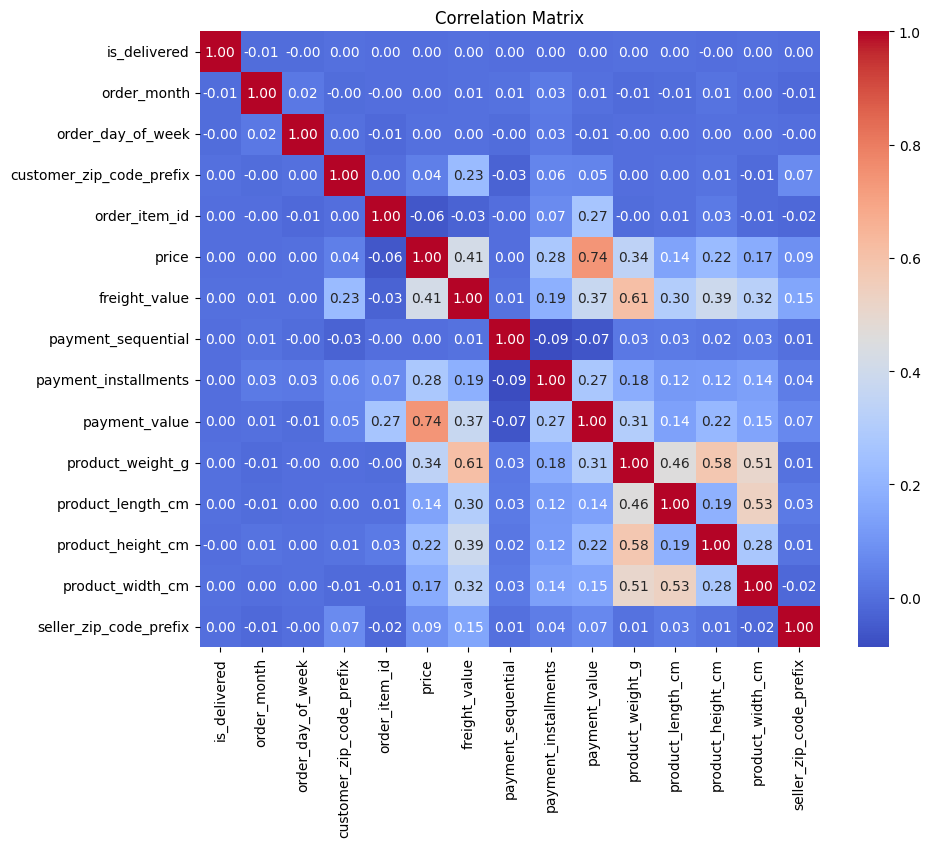

In [37]:

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,fmt='.2f', annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
save_image("Correlation_Matrix")
plt.show()

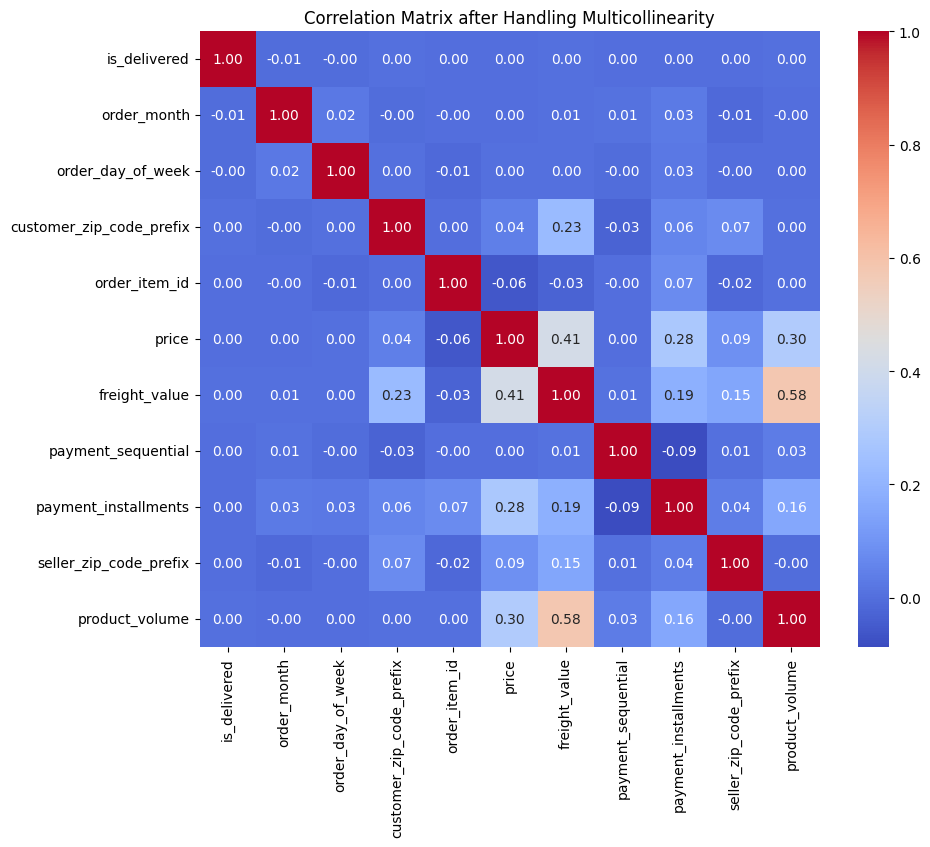

In [38]:
# Drop the highly correlated feature 'payment_value' as it has high correlation with 'price'
full_orders_df =full_orders_df.drop('payment_value', axis=1)

# Drop 'product_weight_g' as it may potentially cause multicolinearlity
full_orders_df = full_orders_df.drop('product_weight_g', axis = 1)

# Create a new feature 'product_volume' by combining 'product_length_cm', 'product_width_cm', and 'product_height_cm'
full_orders_df['product_volume'] = full_orders_df['product_length_cm'] * full_orders_df['product_width_cm'] * full_orders_df['product_height_cm']

# Drop the individual dimension columns after combining, as they are now represented by 'product_volume'
full_orders_df = full_orders_df.drop(['product_length_cm', 'product_width_cm', 'product_height_cm'], axis=1)


numeric_features = full_orders_df.select_dtypes(include=['int64','float64'])

# Check the new correlation matrix to confirm multicollinearity reduction
plt.figure(figsize=(10, 8))

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix after Handling Multicollinearity')
save_image("Correlation_Matrix_After_Handling_Multicollinearity")
plt.show()


In [39]:
full_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113390 entries, 0 to 113389
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       113390 non-null  object         
 1   customer_id                    113390 non-null  object         
 2   order_status                   113390 non-null  object         
 3   order_approved_at              113390 non-null  datetime64[ns] 
 4   order_delivered_carrier_date   113390 non-null  datetime64[ns] 
 5   order_delivered_customer_date  113390 non-null  datetime64[ns] 
 6   order_estimated_delivery_date  113390 non-null  datetime64[ns] 
 7   order_processing_time          113390 non-null  timedelta64[ns]
 8   shipping_preparation_time      113390 non-null  timedelta64[ns]
 9   total_delivery_time            113390 non-null  timedelta64[ns]
 10  delivery_delay                 113390 non-null  timedelt

In [40]:
# Interaction between price and freight_value
full_orders_df['price_freight_interaction'] = full_orders_df['price'] * full_orders_df['freight_value']

# Interaction between product volume and freight value
full_orders_df['volume_freight_interaction'] = full_orders_df['product_volume'] * full_orders_df['freight_value']


In [41]:
# Extract hour of purchase from 'order_approved_at' (or other relevant datetime columns)
full_orders_df['order_hour'] = full_orders_df['order_approved_at'].dt.hour

# Create is_weekend feature based on the day of the week (assuming you have 'order_day_of_week' already)
full_orders_df['is_weekend'] = full_orders_df['order_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Map months to seasons (for 'order_month' or other month-related columns)
season_mapping = {12: 1, 1: 1, 2: 1, 3: 2, 4: 2, 5: 2, 6: 3, 7: 3, 8: 3, 9: 4, 10: 4, 11: 4}
full_orders_df['order_season'] = full_orders_df['order_month'].map(season_mapping)


In [42]:
# Example: Target encoding for product_category_name
category_target_mean = full_orders_df.groupby('product_category_name')['is_delivered'].mean()
full_orders_df['product_category_delivery_rate'] = full_orders_df['product_category_name'].map(category_target_mean)


In [43]:
# Binning price into low, mid, and high price categories
full_orders_df['price_bin'] = pd.qcut(full_orders_df['price'], q=3, labels=['low_price', 'mid_price', 'high_price'])

# Binning freight_value into 3 categories
full_orders_df['freight_value_bin'] = pd.qcut(full_orders_df['freight_value'], q=3, labels=['low_freight', 'mid_freight', 'high_freight'])


In [44]:
# Calculate total spending by customer
customer_spending = full_orders_df.groupby('customer_id')['price'].sum().reset_index()
customer_spending.columns = ['customer_id', 'total_spent']
full_orders_df = full_orders_df.merge(customer_spending, on='customer_id', how='left')


In [45]:
full_orders_df.head()

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_processing_time,shipping_preparation_time,total_delivery_time,...,product_volume,price_freight_interaction,volume_freight_interaction,order_hour,is_weekend,order_season,product_category_delivery_rate,price_bin,freight_value_bin,total_spent
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,8 days 10:28:40,...,1976.0,261.5128,17230.72,11,0,4,1.000000,low_price,low_freight,89.97
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,8 days 10:28:40,...,1976.0,261.5128,17230.72,11,0,4,1.000000,low_price,low_freight,89.97
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,8 days 10:28:40,...,1976.0,261.5128,17230.72,11,0,4,1.000000,low_price,low_freight,89.97
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,13 days 18:46:08,...,4693.0,2701.6120,106812.68,3,0,3,0.999425,high_price,high_freight,118.70
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 09:27:40,...,9576.0,3073.2780,184050.72,8,0,3,1.000000,high_price,high_freight,159.90


## Insights from Feature Engineering and Visualizations

### Interaction Features:
1. **Price-Freight Interaction**:
   - The interaction between `price` and `freight_value` shows a highly skewed distribution, where most orders have a low combined value of price and freight.
   - This insight suggests that most products have relatively low prices and corresponding low freight costs, but there are a few higher-priced, higher-freight items.
   - This interaction feature may help in predicting delivery behavior or customer satisfaction, especially for expensive items with higher freight.

2. **Total Spending Distribution**:
   - The distribution of `total_spent` is also heavily skewed, with most customers spending smaller amounts, but there are a few customers who spend significantly more.
   - The customers who spend more may have different shopping behaviors, which could be further analyzed for targeted promotions or loyalty programs.

3. **Price Bin vs Is Delivered**:
   - The `price_bin` feature indicates that delivery completion (`is_delivered`) is consistent across different price categories.
   - This suggests that product price does not significantly impact whether an order is successfully delivered, but additional interactions could reveal hidden patterns.

### Memory Allocation Error:
While attempting to generate histograms and box plots for interaction features on large datasets, we encountered a **MemoryError**. This occurred due to the size of the dataset and the complexity of calculations required to generate visualizations. Here are the steps taken to resolve this issue:

1. **Sampling**:
   - To avoid memory allocation errors, we took a sample of the data (2,500 rows) for visualization instead of using the entire dataset.
   - Sampling allows for efficient exploration of data without overwhelming system resources while still retaining meaningful insights.

2. **Reducing Complexity in Visualizations**:
   - Instead of using `sns.histplot()` with `kde=True` (which adds extra computational load), we disabled the kernel density estimate (`kde=False`) and set a bin range to focus only on meaningful data points.
   - This helped in visualizing the key features without running into memory issues.

3. **Saving Visualizations Without Displaying**:
   - To further reduce memory usage, visualizations were saved directly to disk without displaying them immediately. This reduces the load on memory and allows for better management of system resources.

These solutions allowed us to continue with the analysis and visualizations, ensuring efficient memory management while still extracting valuable insights from the data.


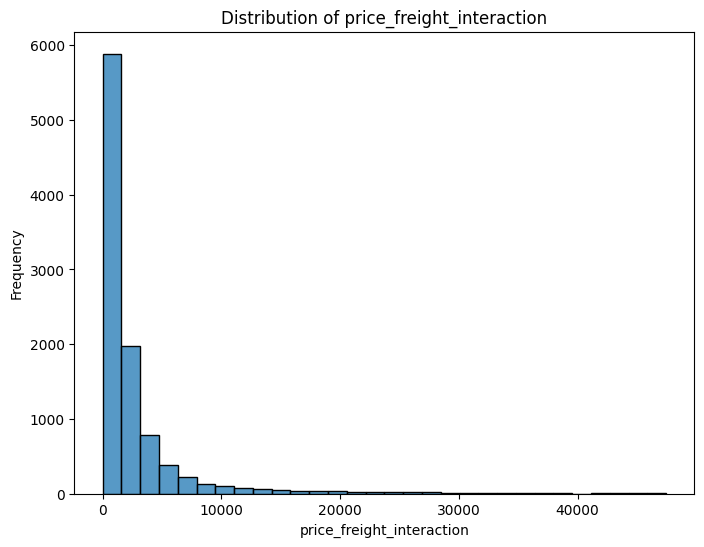

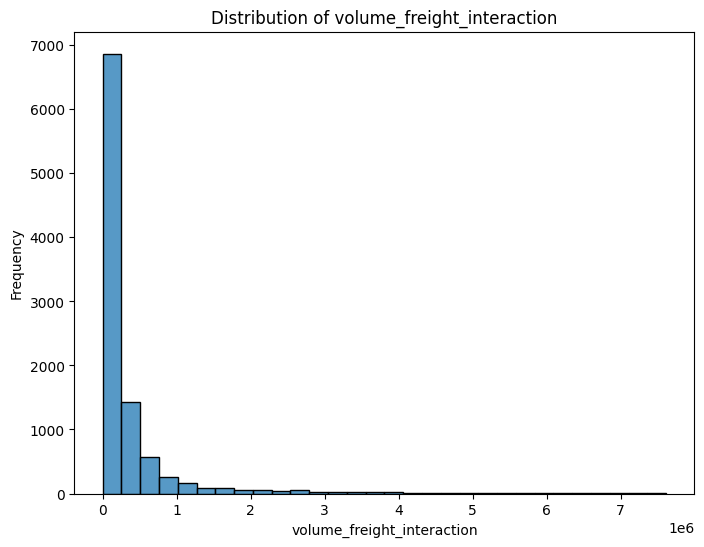

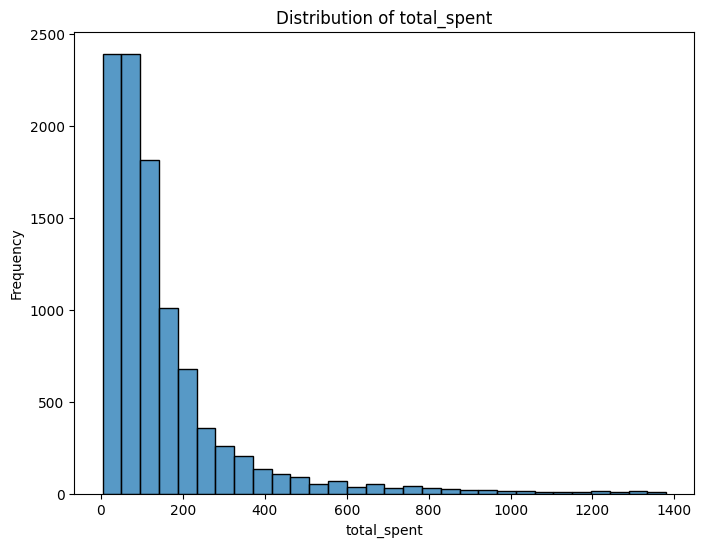

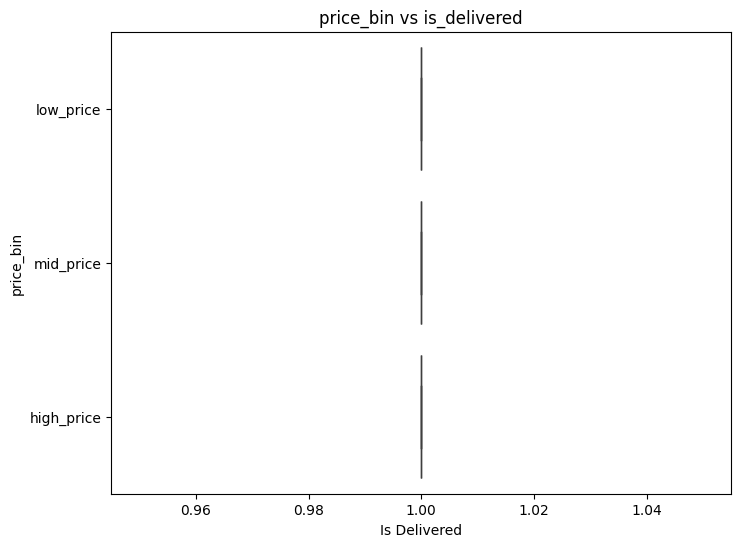

In [52]:

# Take a smaller sample of the data
sampled_data = full_orders_df.sample(n=10000, random_state=42)

# Define path to save plots
save_path = "E:\\DATASCIENCE PORTFOLIO\\Projects\\Segmentation\\Visualizations\\"

# Filter only numeric features for histograms
numeric_features = [feature for feature in new_features if sampled_data[feature].dtype in ['float64', 'int64']]

# Visualize and save distribution for numeric features with limited range and no KDE
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(sampled_data[feature], bins=30, kde=False, 
                 binrange=(np.nanmin(sampled_data[feature]), np.nanpercentile(sampled_data[feature], 99)))
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.savefig(f"{save_path}{feature}_distribution.png", dpi=300)
    plt.show()  # Close plot to free up memory

# For categorical features, use boxplot to show relationship with target variable
categorical_features = ['price_bin']  # Adjust this based on categorical features in new_features

# Visualize categorical features with boxplots
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=sampled_data['is_delivered'], y=sampled_data[feature])
    plt.title(f'{feature} vs is_delivered')
    plt.xlabel('Is Delivered')
    plt.ylabel(feature)
    plt.savefig(f"{save_path}{feature}_vs_is_delivered.png", dpi=300)
    plt.show()  # Close plot to free up memory


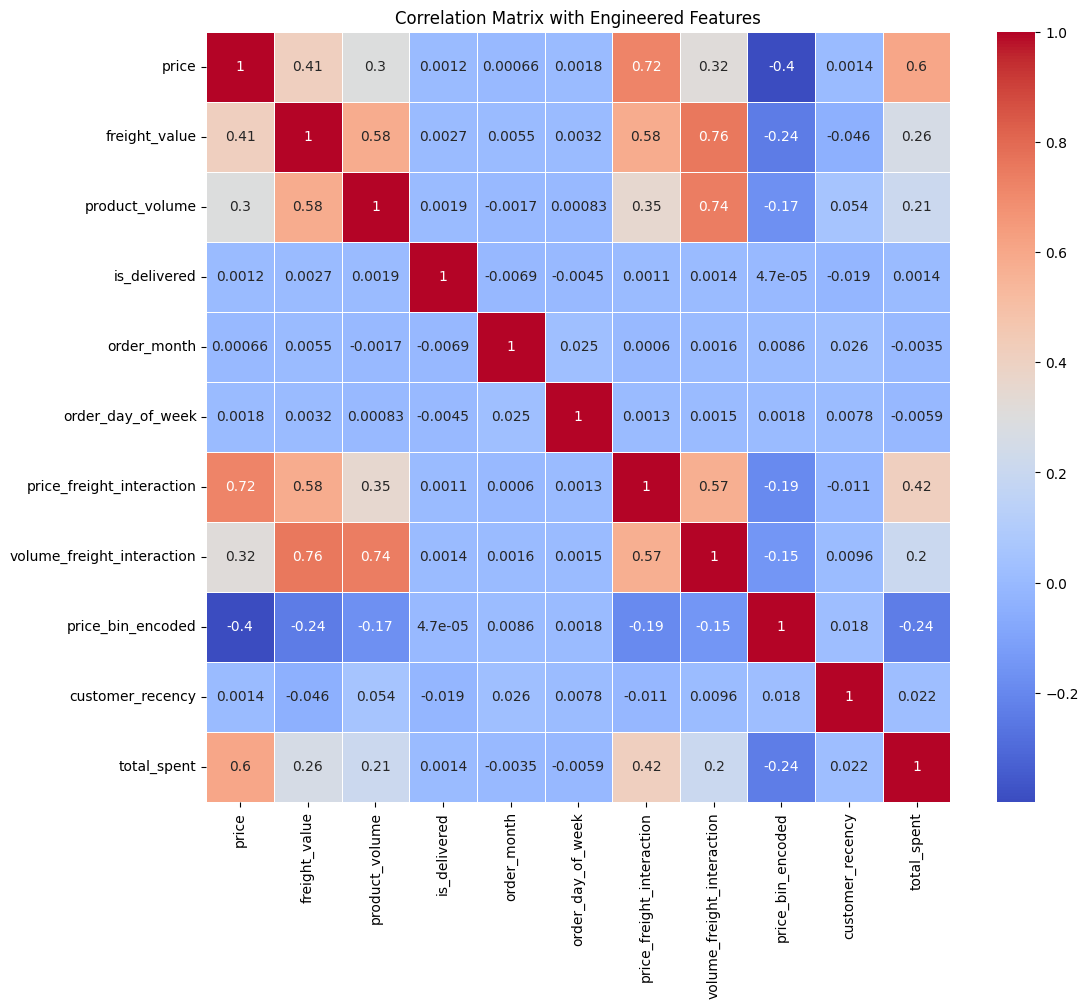

In [57]:

# Convert categorical bins to numerical using LabelEncoder
le = LabelEncoder()
full_orders_df['price_bin_encoded'] = le.fit_transform(full_orders_df['price_bin'])

# List of the new features added during feature engineering, including encoded price_bin
new_features = [
    'price_freight_interaction', 
    'volume_freight_interaction', 
    'price_bin_encoded',  # Use the encoded version of price_bin
    'customer_recency', 
    'total_spent'
]

# Subset the data to include both original features and newly engineered ones
features_for_corr = full_orders_df[['price', 'freight_value', 'product_volume', 'is_delivered', 'order_month', 'order_day_of_week'] + new_features]

# Calculate the correlation matrix
corr_matrix_new = features_for_corr.corr()

# Generate a heatmap to visualize the new correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_new, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix with Engineered Features")
save_image("Correlation Matrix with Engineered Features")
plt.show()


# REVISIT THIS STEP DURING MODELLING

In [58]:
# Optionally drop interaction terms or the original features
full_orders_df.drop(columns=['price_freight_interaction', 'volume_freight_interaction'], inplace=True)
# Alternatively, if you prefer to keep interaction terms, drop original features:
# full_orders_df.drop(columns=['price', 'freight_value', 'product_volume'], inplace=True)
